In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug=pd.read_csv(mouse_drug_data_to_load )
clinical=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
drug.head()

# Display the data table for preview

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [3]:
clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [5]:
combine=drug.merge(clinical, on='Mouse ID',how='left')
combine.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [7]:
mean_tumor=combine.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

In [8]:
mean_tumor=pd.DataFrame(data=mean_tumor)
mean_tumor

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [9]:
mean_tumor=mean_tumor.reset_index()
mean_tumor=mean_tumor.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

In [10]:
mean_tumor

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [11]:
mean_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Drug                 100 non-null object
Timepoint            100 non-null int64
Mean Tumor Volume    100 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [12]:
drugs=mean_tumor['Drug'].unique()
drugs.tolist()

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame


In [14]:
std_tumor=combine.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

In [15]:
std_tumor=pd.DataFrame(data=std_tumor)
std_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [16]:
std_tumor=std_tumor.reset_index()
std_tumor=std_tumor.rename(columns={'Tumor Volume (mm3)':'std Tumor Volume'})

In [17]:
std_tumor

,Drug,Timepoint,std Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

In [19]:
mean_tumor.head()

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [20]:
std_tumor=pd.pivot_table(std_tumor,values=['std Tumor Volume'], index=['Timepoint'],columns=['Drug'])

In [21]:
std_tumor

std Tumor Volume                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10                0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15                0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20                0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   
25                0.881642  0.439356  0.550315  0.755413  0.813706  1.034872   
30                0.934460  0.490620  0.631061  0.934121  0.975496  1.218231   
35                1.052241  0.692248  0.984155  1.127867  1.013769  1.287481   
40                1.223608  0.708505  1.055220  1.158449  1.118567  1.370634   
45                1.223977  0.902358  1.144427  1.453186  1.416363  1.351726   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182  
25         0.577401  0.746991  0.741922  0.602513  
30         0.746045  0.864906  0.899548  0.800043  
35         1.084929  0.967433  1.003186  0.881426  
40         1.564779  1.128445  1.410435  0.998515  
45         1.888586  1.226805  1.576556  1.003576

In [22]:
table = pd.pivot_table(mean_tumor, values=['Mean Tumor Volume'], index=['Timepoint'],
                    columns=['Drug'])

In [23]:
table

Mean Tumor Volume                                              \
Drug              Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                 
0                 45.000000  45.000000  45.000000  45.000000  45.000000   
5                 44.266086  46.503051  47.062001  47.389175  46.796098   
10                43.084291  48.285125  49.403909  49.582269  48.694210   
15                42.064317  50.094055  51.296397  52.399974  50.933018   
20                40.716325  52.157049  53.197691  54.920935  53.644087   
25                39.939528  54.287674  55.715252  57.678982  56.731968   
30                38.769339  56.769517  58.299397  60.994507  59.559509   
35                37.816839  58.827548  60.742461  63.371686  62.685087   
40                36.958001  61.467895  63.162824  66.068580  65.600754   
45                36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [24]:
table.columns.values.tolist()

[('Mean Tumor Volume', 'Capomulin'),
 ('Mean Tumor Volume', 'Ceftamin'),
 ('Mean Tumor Volume', 'Infubinol'),
 ('Mean Tumor Volume', 'Ketapril'),
 ('Mean Tumor Volume', 'Naftisol'),
 ('Mean Tumor Volume', 'Placebo'),
 ('Mean Tumor Volume', 'Propriva'),
 ('Mean Tumor Volume', 'Ramicane'),
 ('Mean Tumor Volume', 'Stelasyn'),
 ('Mean Tumor Volume', 'Zoniferol')]

In [25]:
table.columns=drugs

In [26]:
table=table.reset_index()
table.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


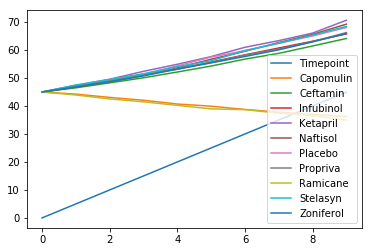

In [27]:
table.plot.line()

In [28]:
errors=table.sem()

In [29]:
drugs[0:4]

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril'], dtype=object)

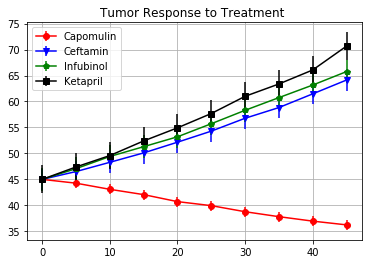

<Figure size 432x288 with 0 Axes>

In [30]:
markers=['o','v','p','s']
colors=['red','blue','green','black']
i=0
for drug in drugs[0:4]:
    fig = plt.figure(0)
    x = table['Timepoint']
    y = table[drug]
    yerr=errors[drug]
    plt.errorbar(x, y, yerr,marker=markers[i],color=colors[i])
    i=i+1
plt.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment ')
plt.show()
plt.savefig('Tumor volume.png')

# Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [32]:
mean_met=combine.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

In [33]:
mean_met=mean_met.reset_index()
mean_met=mean_met.rename(columns={'Metastatic Sites':'Mean Metastatic'})

In [34]:
mean_met.head()

,Drug,Timepoint,Mean Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [35]:
table_met=pd.pivot_table(mean_met,values=['Mean Metastatic'], index=['Timepoint'],columns=['Drug'])

In [36]:
table_met

Mean Metastatic                                                    \
Drug            Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                     
0                0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10               0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15               0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20               0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25               0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30               1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35               1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40               1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45               1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [37]:
table_met.columns=drugs

In [38]:
# Table store the mean of Metastatic Sites

In [39]:
table_met=table_met.reset_index()
table_met.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [40]:
error_met=combine.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()


In [41]:
error_met=error_met.reset_index()
error_met=error_met.rename(columns={'Metastatic Sites':'Mean Metastatic'})

In [42]:
error_met.head()

,Drug,Timepoint,Mean Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [43]:
table_1=pd.pivot_table(error_met,values=['Mean Metastatic'], index=['Timepoint'],columns=['Drug'])

In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [45]:
table_1

Mean Metastatic                                                    \
Drug            Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                     
0                0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10               0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15               0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20               0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25               0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30               0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35               0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40               0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45               0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

In [46]:
table_1.columns=drugs

In [47]:
# Table store the standard errors of mean of Met. Sites

In [48]:
table_1=table_1.reset_index()
table_1.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [49]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

In [50]:
errors_met=table_met.sem()

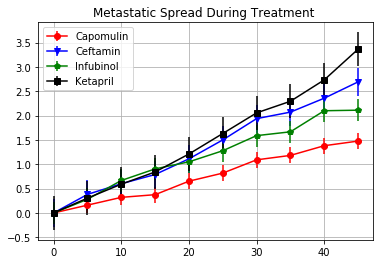

<Figure size 432x288 with 0 Axes>

In [51]:
markers=['o','v','p','s']
colors=['red','blue','green','black']
i=0
for drug in drugs[0:4]:
    fig = plt.figure(0)
    x = table_met['Timepoint']
    y = table_met[drug]
    yerr=errors_met[drug]
    plt.errorbar(x, y, yerr,marker=markers[i],color=colors[i])
    i=i+1
plt.legend()
plt.grid(True)
plt.title('Metastatic Spread During Treatment ')
plt.show()
plt.savefig('metastatic.png')

# Survival Rates

In [52]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

In [53]:
mice=combine.groupby(['Timepoint','Drug'])['Mouse ID'].count()

In [54]:
mice.head()

Timepoint  Drug     
0          Capomulin    25
           Ceftamin     25
           Infubinol    25
           Ketapril     25
           Naftisol     25
Name: Mouse ID, dtype: int64

In [55]:
mean_tumor=pd.DataFrame(data=mean_tumor)
mean_tumor

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [56]:
mice=mice.reset_index()
mice=mice.rename(columns={'Mouse ID':'Mouse Count'})

In [57]:
mice

,Timepoint,Drug,Mouse Count
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25
5,0,Placebo,25
6,0,Propriva,26
7,0,Ramicane,25
8,0,Stelasyn,26
9,0,Zoniferol,25


In [58]:
table_mice=pd.pivot_table(mice,values=['Mouse Count'], index=['Timepoint'],columns=['Drug'])

In [59]:
table_mice

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [60]:
table_mice.columns=drugs
table_mice=table_mice.reset_index()
table_mice

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [61]:
mice=table_mice.set_index('Timepoint')

In [62]:
mice

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [63]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure

In [64]:
mice=mice/25*100
mice

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


In [65]:
pct_mice=mice.reset_index()
pct_mice

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,28.0,80.0,44.0,56.0


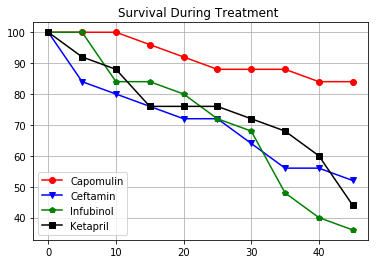

<Figure size 432x288 with 0 Axes>

In [66]:
markers=['o','v','p','s']
colors=['red','blue','green','black']
i=0
for drug in drugs[0:4]:
    fig = plt.figure(0)
    x = pct_mice['Timepoint']
    y = pct_mice[drug]
    plt.errorbar(x, y,marker=markers[i],color=colors[i])
    i=i+1
plt.legend()
plt.grid(True)
plt.title('Survival During Treatment ')
plt.show()
plt.savefig('survival.png')

# Summary Bar Graph

In [67]:
# Calculate the percent changes for each drug

# Display the data to confirm

In [68]:
table_mice['Capomulin'][0]

25

In [69]:
(table_mice['Capomulin'][0]-table_mice[drug][9])/table_mice[drug][0]

0.56000000000000005

In [70]:
mean_tumor.head()

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [71]:
key_list=drugs

In [72]:
value_list=[]

In [73]:
for drug in drugs:
    value_list.append(((table[drug][9]-table[drug][0])/table[drug][0])*100)
    
    
    
    
    
    
    

In [74]:
value_list

[-19.475302667894173,
 42.516491855897442,
 46.123471727851872,
 57.028794686606076,
 53.92334713476923,
 51.297960483151527,
 47.241174863206368,
 -22.320900462766673,
 52.085134287899024,
 46.579750865095249]

In [75]:
sum_data=pd.DataFrame(key_list,value_list)

In [76]:
sum_data

,0
-19.475303,Capomulin
42.516492,Ceftamin
46.123472,Infubinol
57.028795,Ketapril
53.923347,Naftisol
51.297960,Placebo
47.241175,Propriva
-22.320900,Ramicane
52.085134,Stelasyn
46.579751,Zoniferol


In [77]:
sum_data=sum_data.reset_index()

In [78]:
sum_data=sum_data.rename(columns={'index':'prc change',0:'Drug'})

In [79]:
sum_data

,prc change,Drug
0,-19.475303,Capomulin
1,42.516492,Ceftamin
2,46.123472,Infubinol
3,57.028795,Ketapril
4,53.923347,Naftisol
5,51.297960,Placebo
6,47.241175,Propriva
7,-22.320900,Ramicane
8,52.085134,Stelasyn
9,46.579751,Zoniferol


In [80]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [81]:
def tup_loop(data):
    tup=()
    for i in data:
        tup+=(i,)
    return tup

In [82]:
tup_1=tup_loop(sum_data['prc change'])
tup_1

(-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525)

In [83]:
list_1=list(tup_1)

In [84]:
tup_2=tup_loop(sum_data['Drug'])
tup_2

('Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol')

In [85]:
list_2=list(tup_2)

In [86]:
x = np.arange(10)

In [87]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
x_1=np.asarray(list_2)

In [89]:
y_1=np.asarray(list_1)

In [90]:
y_label=["{:.2f}%".format(i) for i in y_1]

In [91]:
y_label

['-19.48%',
 '42.52%',
 '46.12%',
 '57.03%',
 '53.92%',
 '51.30%',
 '47.24%',
 '-22.32%',
 '52.09%',
 '46.58%']

No handles with labels found to put in legend.


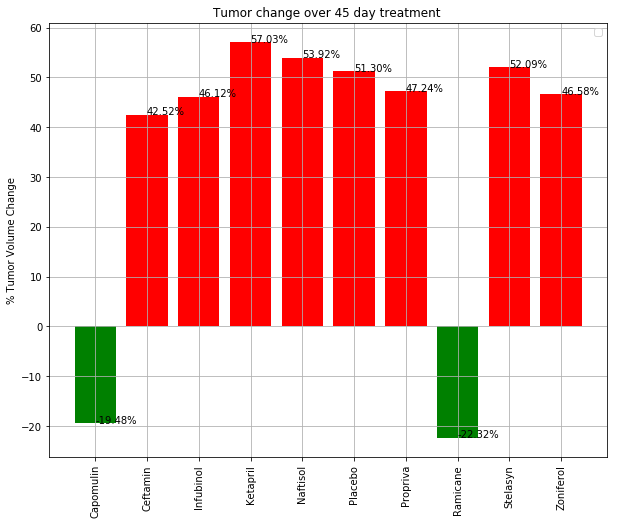

<Figure size 432x288 with 0 Axes>

In [98]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax  = plt.gca()
mask1 = y_1 < 0
mask2 = y_1 >= 0
labels=drugs
plt.bar(x[mask1], y_1[mask1], color = 'green')
plt.bar(x[mask2], y_1[mask2], color = 'red')
plt.xticks(x, labels, rotation='vertical')
for i in range(10):
    ax.text(x=x[i],y=y_1[i],s=y_label[i])
plt.legend()
plt.grid(True)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor change over 45 day treatment ')
plt.show()

#plt(figsize=(20,10))
#fig.set_size_inches(25, 18, forward= True)
plt.savefig('sum_graph.png')